In [2]:
import pandas as pd

#Load movie datasets
movie = pd.read_csv(r"C:\Users\calan\Desktop\HTML\movie.csv")
print(movie.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
#Load rating datasets
rating = pd.read_csv(r"C:\Users\calan\Desktop\HTML\rating.csv")
print(rating.head())


   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


Merge movie and rating datasets.

In [3]:
import pandas as pd

#Load datasets
movie = pd.read_csv(r"C:\Users\calan\Desktop\HTML\movie.csv")
rating = pd.read_csv(r"C:\Users\calan\Desktop\HTML\rating.csv")

#Merge on 'movieId' 
df = pd.merge(rating, movie, on='movieId')

#print head
print(df.head())

   userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller  


In [4]:
# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create new columns for date and time
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

# Show updated DataFrame
print(df[['userId', 'movieId', 'rating', 'date', 'time']].head())


   userId  movieId  rating        date      time
0       1        2     3.5  2005-04-02  23:53:47
1       1       29     3.5  2005-04-02  23:31:16
2       1       32     3.5  2005-04-02  23:33:39
3       1       47     3.5  2005-04-02  23:32:07
4       1       50     3.5  2005-04-02  23:29:40


In [5]:
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
print(df[['time', 'month', 'year']].head())


       time  month  year
0  23:53:47      4  2005
1  23:31:16      4  2005
2  23:33:39      4  2005
3  23:32:07      4  2005
4  23:29:40      4  2005


In [6]:
#check for missing value
print(df.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
date         0
time         0
month        0
year         0
dtype: int64


In [7]:
#check for data types
print(df.dtypes)

userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
title                object
genres               object
date                 object
time                 object
month                 int32
year                  int32
dtype: object


In [8]:
# Get year from title
df['year_released'] = df['title'].str[-5:-1]  # last 5 characters like "(1995"

# Get clean title without the year
df['title_clean'] = df['title'].str[:-7]  # remove " (1995)" from the end

# Show results
print(df[['title', 'title_clean', 'year_released']].head())



                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                         title_clean year_released  
0                                            Jumanji          1995  
1  City of Lost Children, The (Cité des enfants p...          1995  
2                 Twelve Monkeys (a.k.a. 12 Monkeys)          1995  
3                               Seven (a.k.a. Se7en)          1995  
4                                Usual Suspects, The          1995  


In [9]:
print(df.head())

   userId  movieId  rating           timestamp  \
0       1        2     3.5 2005-04-02 23:53:47   
1       1       29     3.5 2005-04-02 23:31:16   
2       1       32     3.5 2005-04-02 23:33:39   
3       1       47     3.5 2005-04-02 23:32:07   
4       1       50     3.5 2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres        date      time  month  year  \
0              Adventure|Children|Fantasy  2005-04-02  23:53:47      4  2005   
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  2005-04-02  23:31:16      4  2005   
2                 Mystery|Sci-Fi|Thriller  2005-04-02  23:33:39      4  2005   
3                        Mystery|Thriller 

In [10]:
print(df.shape[0])  # number of rows


20000263


In [11]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   userId         int64         
 1   movieId        int64         
 2   rating         float64       
 3   timestamp      datetime64[ns]
 4   title          object        
 5   genres         object        
 6   date           object        
 7   time           object        
 8   month          int32         
 9   year           int32         
 10  year_released  object        
 11  title_clean    object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 1.6+ GB
None


In [12]:
#df_sample = df.sample(100000, random_state=42)
df['genres'] = df['genres'].astype('category')

df['title'] = df['title'].astype('category')
df['year_released'] = pd.to_numeric(df['year_released'], errors='coerce').astype('Int16')


In [13]:
print(df.head())

   userId  movieId  rating           timestamp  \
0       1        2     3.5 2005-04-02 23:53:47   
1       1       29     3.5 2005-04-02 23:31:16   
2       1       32     3.5 2005-04-02 23:33:39   
3       1       47     3.5 2005-04-02 23:32:07   
4       1       50     3.5 2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres        date      time  month  year  \
0              Adventure|Children|Fantasy  2005-04-02  23:53:47      4  2005   
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  2005-04-02  23:31:16      4  2005   
2                 Mystery|Sci-Fi|Thriller  2005-04-02  23:33:39      4  2005   
3                        Mystery|Thriller 

In [14]:
# Step 1: Drop duplicate movies to count each movie once
unique_movies = df[['movieId', 'genres']].drop_duplicates()

# Step 2: Split genres by '|'
genre_split = unique_movies['genres'].str.split('|')

# Step 3: Explode the list into separate rows
genre_exploded = genre_split.explode()

# Step 4: Count each genre
genre_counts = genre_exploded.value_counts().reset_index()
genre_counts.columns = ['Genre', 'Movie Count']

# Show result
print(genre_counts)


                 Genre  Movie Count
0                Drama        13062
1               Comedy         8232
2             Thriller         4129
3              Romance         4029
4               Action         3466
5                Crime         2889
6               Horror         2590
7          Documentary         2391
8            Adventure         2287
9               Sci-Fi         1720
10             Mystery         1489
11             Fantasy         1398
12                 War         1173
13            Children         1118
14             Musical         1016
15           Animation         1015
16             Western          656
17           Film-Noir          322
18  (no genres listed)          242
19                IMAX          195


In [15]:
# Step 1: Drop duplicate movies (so you don't count the same movie multiple times)

unique_movies = df[['movieId', 'genres']].drop_duplicates()

# Step 2: Count each unique genre combination
genre_combos = unique_movies['genres'].value_counts().reset_index()
genre_combos.columns = ['Genre Combination', 'Movie Count']

# Step 3: Show top 10 most common genre combinations
print(genre_combos.head(15))


       Genre Combination  Movie Count
0                  Drama         4416
1                 Comedy         2251
2            Documentary         1879
3           Comedy|Drama         1241
4          Drama|Romance         1043
5         Comedy|Romance          741
6   Comedy|Drama|Romance          594
7                 Horror          556
8            Crime|Drama          435
9         Drama|Thriller          421
10             Drama|War          394
11       Horror|Thriller          372
12  Crime|Drama|Thriller          299
13              Thriller          264
14    (no genres listed)          242


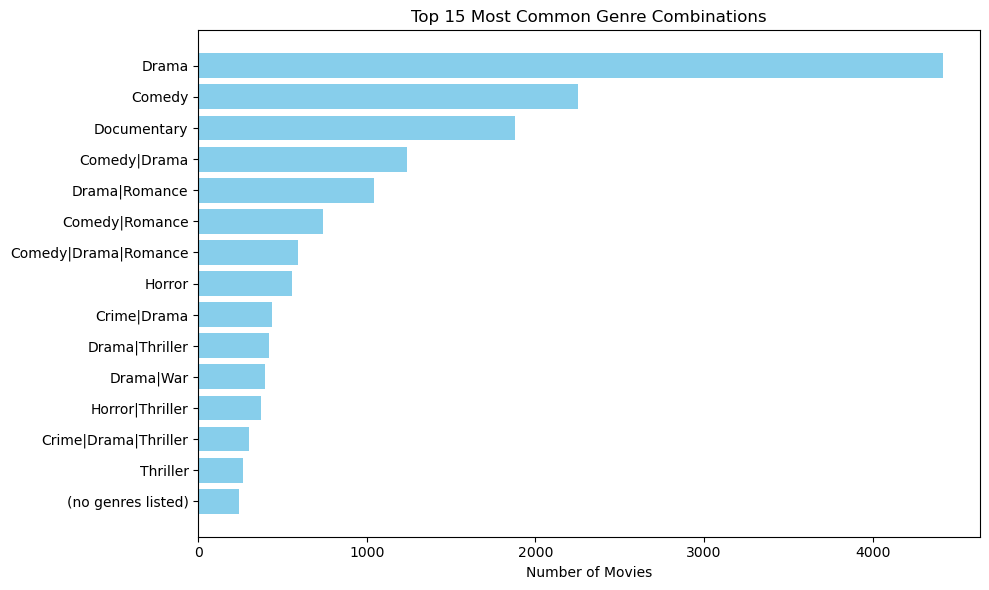

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get unique movies and count genre combinations
unique_movies = df[['movieId', 'genres']].drop_duplicates()
genre_combos = unique_movies['genres'].value_counts().reset_index()
genre_combos.columns = ['Genre Combination', 'Movie Count']

# Step 2: Plot the top 10
top_10 = genre_combos.head(15)

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['Genre Combination'], top_10['Movie Count'], color='skyblue')
plt.xlabel("Number of Movies")
plt.title("Top 15 Most Common Genre Combinations")
plt.gca().invert_yaxis()  # most frequent on top
plt.tight_layout()
plt.show()


In [17]:
# Full genre list
genres_list = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Create a dictionary to hold counts
genre_counts = {genre: 0 for genre in genres_list}

# Loop through each row in the genres column
for genre_string in df['genres']:
    if pd.isna(genre_string):
        continue
    genre_split = genre_string.split('|')
    for genre in genre_split:
        if genre in genre_counts:
            genre_counts[genre] += 1

# Print the results
print("Movie Counts by Genre (all rows counted):\n")
for genre, count in genre_counts.items():
    print(f"{genre}: {count} movies")


Movie Counts by Genre (all rows counted):

Action: 5614208 movies
Adventure: 4380351 movies
Animation: 1140476 movies
Children: 1669249 movies
Comedy: 7502234 movies
Crime: 3298335 movies
Documentary: 244619 movies
Drama: 8857853 movies
Fantasy: 2111403 movies
Film-Noir: 216689 movies
Horror: 1482737 movies
IMAX: 492366 movies
Musical: 870915 movies
Mystery: 1557282 movies
Romance: 3802002 movies
Sci-Fi: 3150141 movies
Thriller: 5313506 movies
War: 1048618 movies
Western: 423714 movies


In [18]:
# Step 1: Drop duplicate movies to avoid counting a movie twice
unique_movies = df[['movieId', 'genres']].drop_duplicates()

# Step 2: Split genre strings by '|'
genre_split = unique_movies['genres'].str.split('|')

# Step 3: Explode the list into individual genre entries
genre_exploded = genre_split.explode()

# Step 4: Get unique genres
unique_genres = genre_exploded.unique()

# Step 5: Sort and print
unique_genres = sorted(unique_genres)
print("Unique genres in the dataset:")
for genre in unique_genres:
    print("-", genre)


Unique genres in the dataset:
- (no genres listed)
- Action
- Adventure
- Animation
- Children
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- IMAX
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western


In [20]:
no_genres_count = df[df['genres'] == '(no genres listed)'].shape[0]
print(f"(no genres listed): {no_genres_count} movies")


(no genres listed): 361 movies


In [19]:
# Step 1: Drop duplicate movies to avoid counting a movie twice
unique_movies = df[['movieId', 'genres']].drop_duplicates()

# Step 2: Split genre strings by '|'
genre_split = unique_movies['genres'].str.split('|')

# Step 3: Explode the list into individual genre entries
genre_exploded = genre_split.explode()

# Step 4: Get unique genres
unique_genres = genre_exploded.unique()

# Step 5: Sort and print
unique_genres = sorted(unique_genres)
print("Unique genres in the dataset:")
for genre in unique_genres:
    print("-", genre)


Unique genres in the dataset:
- (no genres listed)
- Action
- Adventure
- Animation
- Children
- Comedy
- Crime
- Documentary
- Drama
- Fantasy
- Film-Noir
- Horror
- IMAX
- Musical
- Mystery
- Romance
- Sci-Fi
- Thriller
- War
- Western


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   userId         int64         
 1   movieId        int64         
 2   rating         float64       
 3   timestamp      datetime64[ns]
 4   title          category      
 5   genres         category      
 6   date           object        
 7   time           object        
 8   month          int32         
 9   year           int32         
 10  year_released  Int16         
 11  title_clean    object        
dtypes: Int16(1), category(2), datetime64[ns](1), float64(1), int32(2), int64(2), object(3)
memory usage: 1.3+ GB
None


In [21]:
print(len(df))

20000263


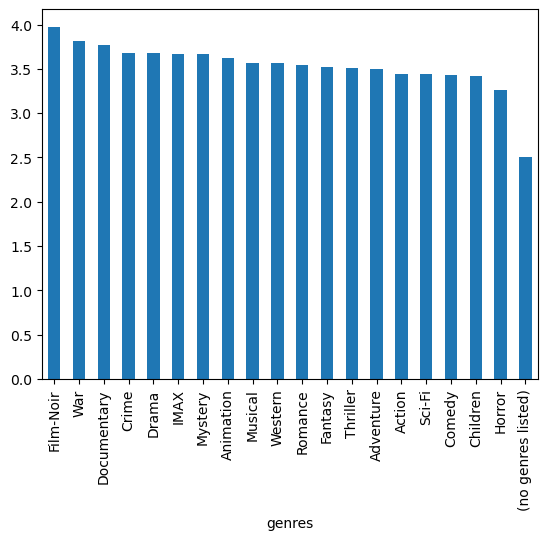

In [22]:
df_sample = df.sample(500_000, random_state=42)

df_sample['genres'] = df_sample['genres'].str.split('|')
df_sample = df_sample.explode('genres')

# Plot from this
genre_avg = df_sample.groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_avg.plot(kind='bar')
plt.show()



In [23]:
num_users = df['userId'].nunique()
print(f"Total unique users: {num_users}")


Total unique users: 138493


In [24]:
num_users = df['userId'].nunique()
total_ratings = len(df)

average_ratings_per_user = total_ratings / num_users
print(f"Average number of movies rated per user: {average_ratings_per_user:.2f}")


Average number of movies rated per user: 144.41


In [25]:
print(df.columns)

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'date',
       'time', 'month', 'year', 'year_released', 'title_clean'],
      dtype='object')


In [26]:
# Step 1: Define the function for rating category
def categorize_rating(rating):
    if 0.0 <= rating <= 1.4:
        return "Flop (0.0–1.4)"
    elif 1.5 <= rating <= 2.4:
        return "Below Average (1.5–2.4)"
    elif 2.5 <= rating <= 3.0:
        return "Average (2.5–3.0)"
    elif 3.1 <= rating <= 3.6:
        return "Hit (3.1–3.6)"
    elif 3.7 <= rating <= 4.0:
        return "Super Hit (3.7–4.0)"
    else:
        return "Invalid Rating"

# Step 2: Apply the function to create a new column
df['rating_category'] = df['rating'].apply(categorize_rating)

# Step 3: Optional – Preview the results
print(df[['rating', 'rating_category']].head())


   rating rating_category
0     3.5   Hit (3.1–3.6)
1     3.5   Hit (3.1–3.6)
2     3.5   Hit (3.1–3.6)
3     3.5   Hit (3.1–3.6)
4     3.5   Hit (3.1–3.6)


In [27]:
print(df.columns)

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'date',
       'time', 'month', 'year', 'year_released', 'title_clean',
       'rating_category'],
      dtype='object')


In [28]:
print(df.head())

   userId  movieId  rating           timestamp  \
0       1        2     3.5 2005-04-02 23:53:47   
1       1       29     3.5 2005-04-02 23:31:16   
2       1       32     3.5 2005-04-02 23:33:39   
3       1       47     3.5 2005-04-02 23:32:07   
4       1       50     3.5 2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres        date      time  month  year  \
0              Adventure|Children|Fantasy  2005-04-02  23:53:47      4  2005   
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  2005-04-02  23:31:16      4  2005   
2                 Mystery|Sci-Fi|Thriller  2005-04-02  23:33:39      4  2005   
3                        Mystery|Thriller 

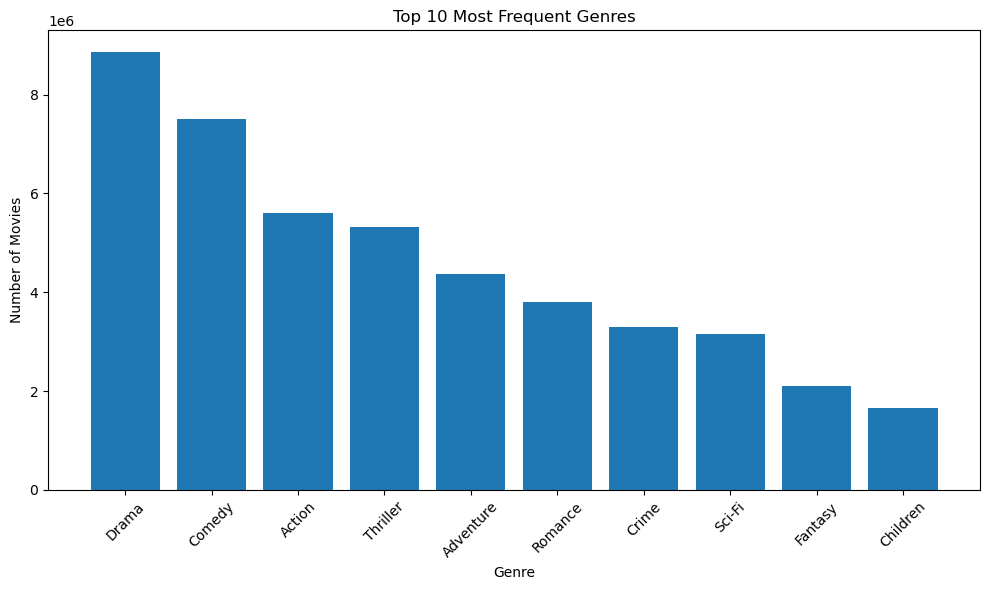

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the genre list
genres_list = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Initialize the genre counts
genre_counts = {genre: 0 for genre in genres_list}

# Loop to count genres
for genre_string in df['genres']:
    if pd.isna(genre_string):
        continue
    for genre in genre_string.split('|'):
        if genre in genre_counts:
            genre_counts[genre] += 1

# Convert to DataFrame and get top 10
genre_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'])
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# Full genre list
genres_list = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Create a dictionary to hold counts
genre_counts = {genre: 0 for genre in genres_list}

# Loop through each row in the genres column
for genre_string in df['genres']:
    if pd.isna(genre_string):
        continue
    genre_split = genre_string.split('|')
    for genre in genre_split:
        if genre in genre_counts:
            genre_counts[genre] += 1

# Print the results in descending order
print("Movie Counts by Genre (sorted from most to least):\n")
for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{genre}: {count} movies")


Movie Counts by Genre (sorted from most to least):

Drama: 8857853 movies
Comedy: 7502234 movies
Action: 5614208 movies
Thriller: 5313506 movies
Adventure: 4380351 movies
Romance: 3802002 movies
Crime: 3298335 movies
Sci-Fi: 3150141 movies
Fantasy: 2111403 movies
Children: 1669249 movies
Mystery: 1557282 movies
Horror: 1482737 movies
Animation: 1140476 movies
War: 1048618 movies
Musical: 870915 movies
IMAX: 492366 movies
Western: 423714 movies
Documentary: 244619 movies
Film-Noir: 216689 movies


In [31]:
# Create a dictionary to hold counts of rating categories
rating_counts = {}

# Loop through each row in the rating_category column
for category in df['rating_category']:
    if pd.isna(category):
        continue
    if category in rating_counts:
        rating_counts[category] += 1
    else:
        rating_counts[category] = 1

# Print the results in descending order
print("Movie Counts by Rating Category (sorted from most to least):\n")
for category, count in sorted(rating_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category}: {count} movies")


Movie Counts by Rating Category (sorted from most to least):

Super Hit (3.7–4.0): 5561926 movies
Average (2.5–3.0): 5174591 movies
Invalid Rating: 4433484 movies
Hit (3.1–3.6): 2200156 movies
Below Average (1.5–2.4): 1710249 movies
Flop (0.0–1.4): 919857 movies


In [33]:

import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# --- Step 1: Define genres list ---
genres_list = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# --- Step 2: Global count storage ---
genre_counts = {genre: 0 for genre in genres_list}
genre_rating_counts = {genre: defaultdict(int) for genre in genres_list}

# --- Step 3: Process in memory-safe chunks ---
chunk_size = 100_000
num_chunks = (len(df) // chunk_size) + 1

for i in range(num_chunks):
    chunk = df.iloc[i * chunk_size : (i + 1) * chunk_size]
    
    for idx, row in chunk.iterrows():
        genres = row.get('genres')
        rating_cat = row.get('rating_category')
        
        if pd.isna(genres) or pd.isna(rating_cat):
            continue
        
        for g in genres.split('|'):
            if g in genres_list:
                genre_counts[g] += 1
                genre_rating_counts[g][rating_cat] += 1

# --- Step 4: Get Top 10 Genres ---
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
top_10_genres = [g for g, _ in sorted_genres[:10]]

# --- Step 5: Prepare DataFrame for plotting ---
plot_data = {}
for genre in top_10_genres:
    plot_data[genre] = genre_rating_counts[genre]

rating_df = pd.DataFrame(plot_data).fillna(0)

# --- Step 6: Plot ---
rating_df.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Rating Category Distribution Across Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.legend(title='Rating Category')
plt.tight_layout()
plt.show()


MemoryError: Unable to allocate 153. MiB for an array with shape (20000263,) and data type object